### Business Problem Understanding

#### Dream Housing Finance company deals in all kinds of home loans .they have presence across All uraban,semi urban and rural Areas. Customer first applies for home loan and after that company validates the customer eligibility for Loan.
Company wants to automate the loan eligibility process(real time) based on customer detail provided while filling online applications form .these details are Gender ,Marital Status,
Education, Number of dependents,income ,loan Amount  ,Credit History and others.To automate this process,they provided a data set to identify the customer segments that are eligible for loan so that can specifically target the these customers,

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter ("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\satis_asxzdl9\Downloads\LoanData.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#lets check the column names present in the  dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Data understanding

### Loan ID Unique Loan ID

Gender: Male/Female

Married Applicant married

Dependents: Number of dependents

Education: Applicant Education

Self Employed whether the applicant is Self employed

Applicantincome: Applicant income

Coapplicantincome: Coapplicant income

LoanAmount: Loan amount in thousands

Loan Amount Term: Term of loan in months

Credit History credit history meets guidelines

Property Area: Urban/ Semi Urban/ Rural

Loan Status: Loan approved target variable


In [6]:
df['Loan_ID'].nunique()

614

In [7]:
df.drop(columns=['Loan_ID'],inplace=True)

In [8]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
df['Dependents'].nunique()

4

In [13]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
df['Education'].nunique()

2

In [15]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
df['Self_Employed'].nunique()

2

In [17]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [18]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [19]:
df['ApplicantIncome'].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

In [20]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [21]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [22]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [23]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [24]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [25]:
df['Credit_History']=df['Credit_History'].replace({1:"good",0:"bad"})

In [26]:
df['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [27]:
df['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [28]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [29]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [30]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [31]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [32]:
continous =['ApplicantIncome','CoapplicantIncome','LoanAmount']

discrete_categorical =['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

### Exploratory Data Analysis(EDA)

for continous Variable

In [33]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


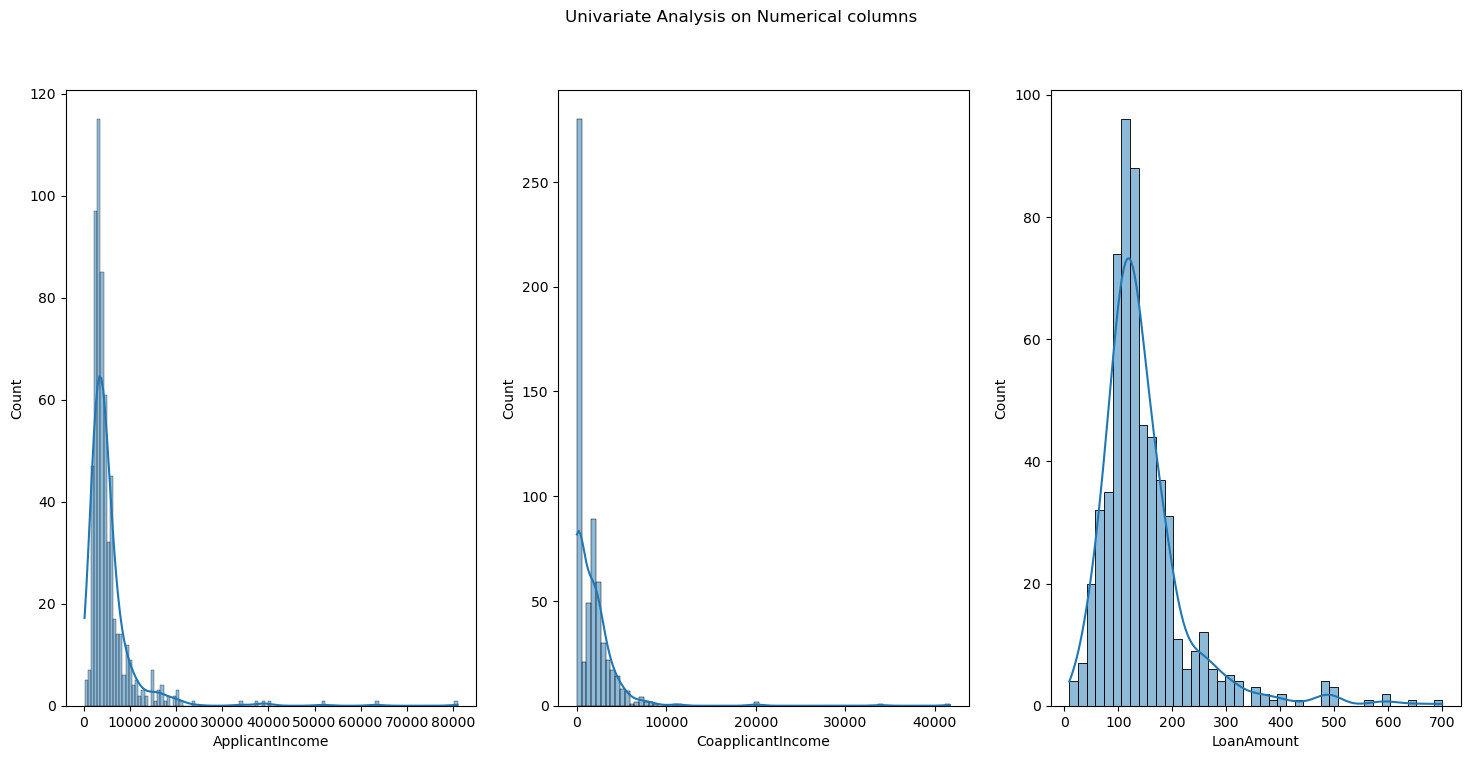

In [34]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,3,1)
sns.histplot(df['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(df['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(df['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical columns')
plt.show()

In [35]:
df[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

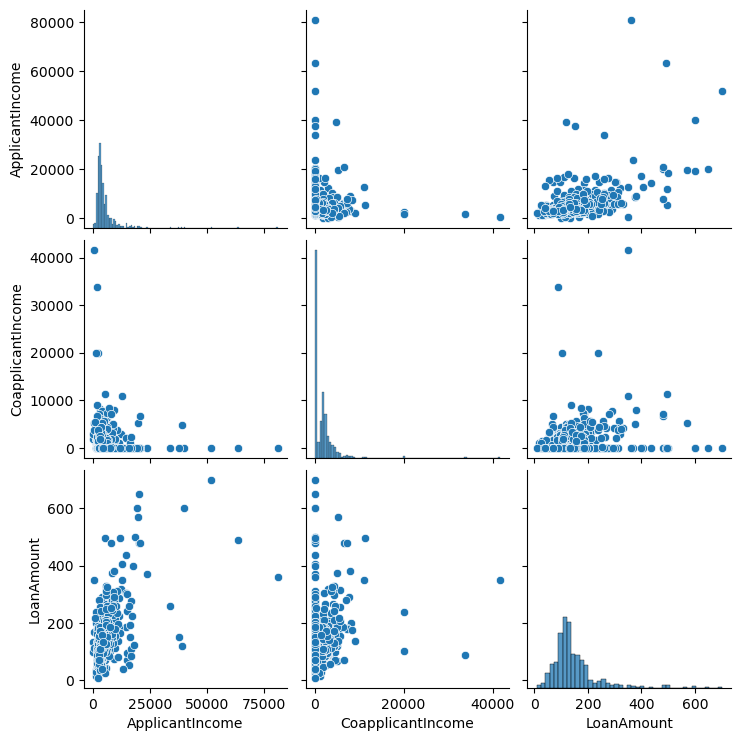

In [36]:
sns.pairplot(df[continous])
plt.show()

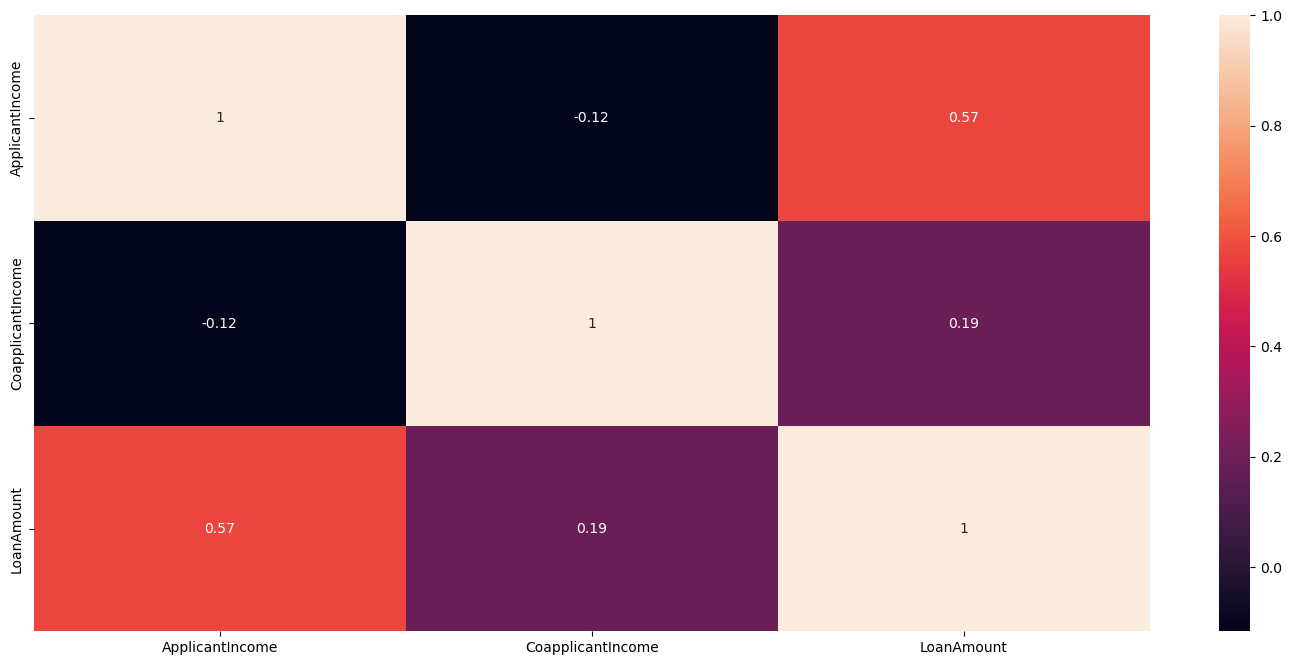

In [37]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

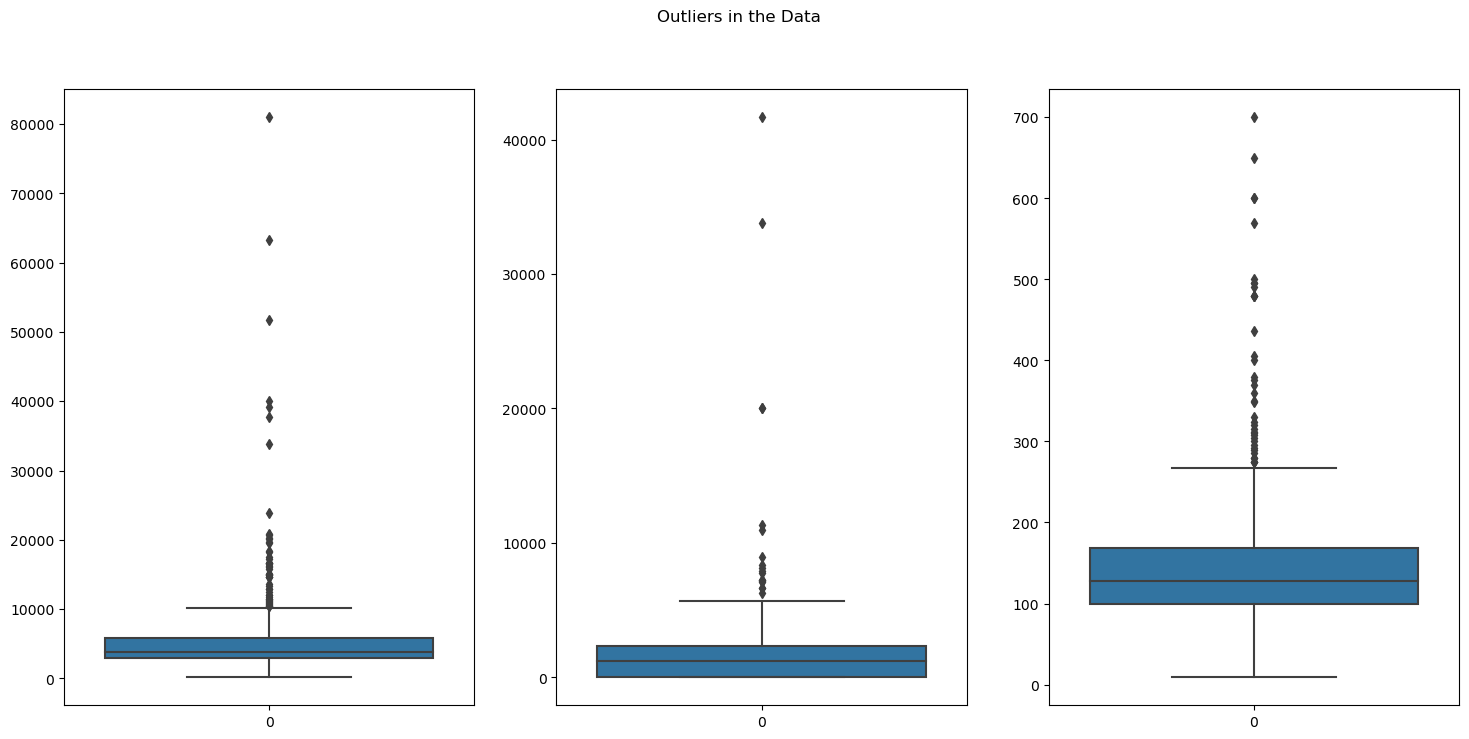

In [38]:
#lets visualize the outliers using box plot

plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()

### For Discreate Variable

In [39]:
df[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


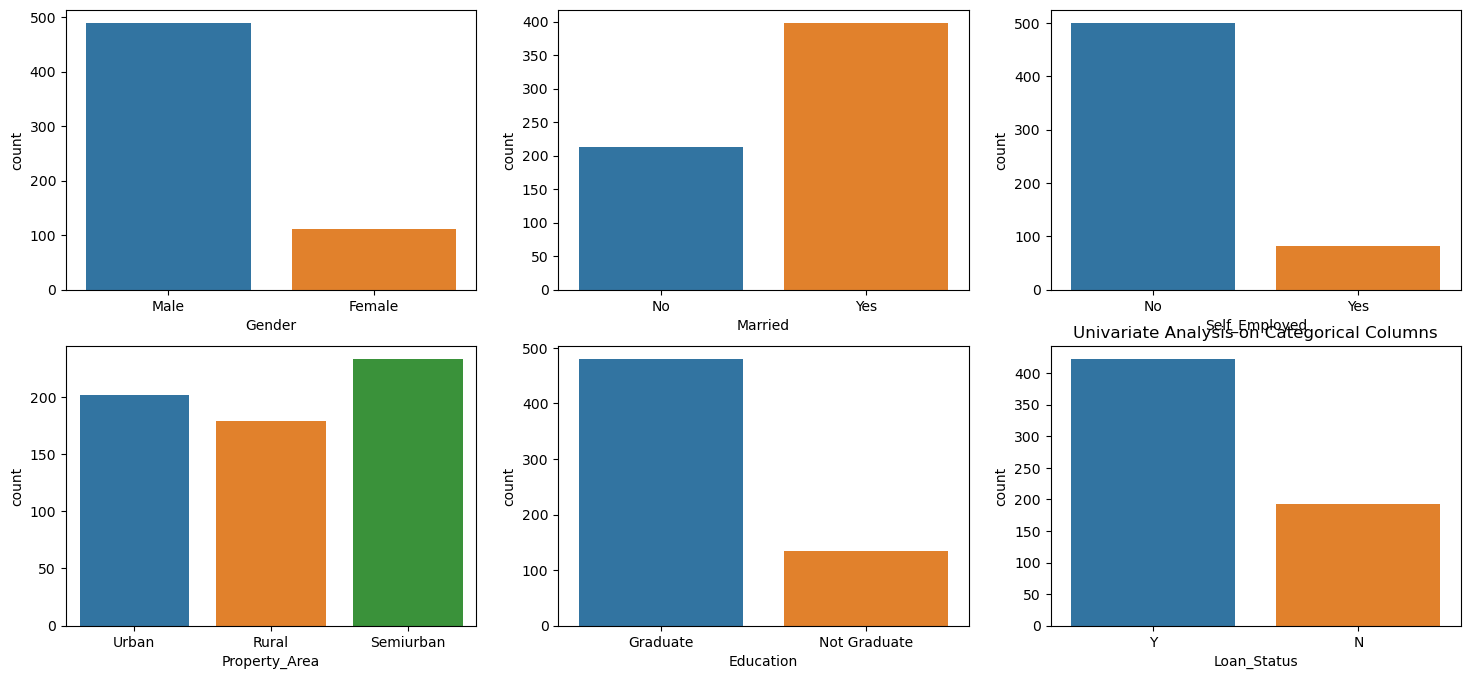

In [40]:
plt.rcParams['figure.figsize']=(18,8)


plt.subplot(2,3,1)
sns.countplot(x = df['Gender'])

plt.subplot(2,3,2)
sns.countplot(x = df['Married'])

plt.subplot(2,3,3)
sns.countplot(x = df['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(x = df['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(x = df['Education'])

plt.subplot(2,3,6)
sns.countplot(x = df['Loan_Status'])

plt.title('Univariate Analysis on Categorical Columns')
plt.show()

### Data Preparation

In [41]:
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

### modifying the Wrong data

In [42]:
df['Dependents']=df['Dependents'].replace({'3+':3})

### Missing Value Treatments

In [43]:
# chexking no .of missing values
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [44]:
#checkig percentage of missing values
df.isnull().sum()/len(df)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [45]:
df = df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

In [46]:
#count variable replace with 0
df['Dependents']=df['Dependents'].fillna(0)

In [47]:
#categorical variable replace with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [48]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

### outliers treatment

Encoding

In [49]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0}).astype('int')
df['Married']=df['Married'].replace({'Yes':1,'No':0}).astype('int')
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0}).astype('int')
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2}).astype('int')
df['Credit_History']=df['Credit_History'].replace({'good':1,'bad':0}).astype('int')
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0}).astype('int')

### data type conversion

In [50]:
df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

### Transformations

In [51]:
df[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [52]:
#lets apply boxcox transformation to remove skewness

from scipy.stats import boxcox
df['Income'],a =boxcox(df['Income'])
df['LoanAmount'],c= boxcox(df['LoanAmount'])

In [53]:
df[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [54]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

# X & y

In [55]:
X = df.drop('Loan_Status',axis=1)
y =df['Loan_Status']

### Identify the best random state number

In [56]:
Train =[]
# Test = []
Test = []
CV = []


for i in range (0,101):
     
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    
    log_default = LogisticRegression(max_iter=1000)
    log_default.fit(x_train,y_train)
    
    ypred_train = log_default.predict(x_train)
    ypred_test = log_default.predict(x_test)
    
    
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train , ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default, x_train , y_train ,cv =5 , scoring = "accuracy").mean())
    
    
em = pd.DataFrame({"Train":Train , "Test":Test ,  "CV":CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print(" best random_state number:",rs)
    
            

 best random_state number: 70


# Train -Test-Split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


### Machine Learning Modelling & Evaluations

# 1.Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train =log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validatin score:",cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8108747044917257
Cross validatin score: [0.81176471 0.77647059 0.82352941 0.79761905 0.8452381 ]
Test Accuracy: 0.8301886792452831


# 2.KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

param_grid ={'n_neighbors':list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(knn_model,X_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.7872340425531915
Cross Validation Score: [0.75294118 0.71764706 0.74117647 0.73809524 0.80952381]
Test Accuracy: 0.7547169811320755


### 3.Support Vector Machine(SVM)

In [60]:
from sklearn.svm import SVC

estimator = SVC()

param_grid ={'C':[0.01,0.1,1],'kernel':['liner','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV

svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)


print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Valdation Score:",cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.6926713947990544
Cross Valdation Score: [0.69411765 0.69411765 0.69411765 0.69047619 0.69047619]
Test Accuracy: 0.6886792452830188


### 4.Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
estimator =DecisionTreeClassifier(random_state=rs)
param_grid ={"criterion":["gini","entropy"],
            "max_depth":list(range(1,16))}


from sklearn.model_selection import GridSearchCV
dt_grid =GridSearchCV(estimator,param_grid, scoring ='accuracy',cv=5)
dt_grid.fit(x_train,y_train)

#identify the best moodel
dt = dt_grid.best_estimator_

#identify the importance of each feature
dt_fi = dt.feature_importances_

#identify the features where the  features importance is greater than 0

index = [i for i,x in enumerate(dt_fi) if x>0]

#create new dataset with important features
x_train_dt =x_train.iloc[:,index]
x_test_dt = x_test.iloc[:,index]

#train with best model & with important features 
dt.fit(x_train_dt,y_train)

ypred_train =dt.predict(x_train_dt)
ypred_test =dt.predict(x_test_dt)

#Evalvate the best model

print("Train Accurcy :",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accurcy : 0.6926713947990544
Cross validation score: 0.6856022408963586
Test Accuracy: 0.6886792452830188


In [62]:
dt_grid.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=70)

In [63]:
x_test_dt

,LoanAmount
455,5.782820
552,6.588770
492,5.999056
360,5.517040
354,6.268459
...,...
160,5.815384
381,7.663035
383,6.243267
520,4.631571


### 5.Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state=rs)
param_grid ={'n_estimators':list(range(1,51))}


from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf_fi =rf.feature_importances_

index = [i for i,x in enumerate(rf_fi) if x>0]

X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

rf.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)


print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9976359338061466
Cross Validation Score: [0.8        0.70588235 0.83529412 0.79761905 0.83333333]
Test Accuracy: 0.7641509433962265


### 6.AdaBoost Classifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier

estimator = AdaBoostClassifier(random_state=rs)

param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)


ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index  = [i for i,x in enumerate(ab_fi) if x>0]

X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

ab.fit(X_train_ab,y_train)

ypred_train_ab = ab.predict(X_train_ab)
ypred_test_ab =  ab.predict(X_test_ab)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.9976359338061466
Cross Validation Score: [0.81176471 0.77647059 0.82352941 0.79761905 0.8452381 ]
Test Accuracy: 0.7641509433962265


# 7.Gradient Boost Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

estimator = GradientBoostingClassifier(random_state=rs)
param_grid ={'n_estimators':list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5]}


from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i,x in enumerate(gb_fi) if x>0]

X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8156028368794326
Cross Validation Score: [0.8        0.76470588 0.82352941 0.79761905 0.8452381 ]
Test Accuracy: 0.8301886792452831


In [70]:
!pip install xgboost

### 8.XGBOOSt Classifier

In [72]:
from xgboost import XGBClassifier
estimator =XGBClassifier(random_state=rs)
param_grid = {"n_estimators":[10,20,40,100],'max_depth':[3,4,5],'gamma':[0,0.15,0.3]}

from sklearn.model_selection import GridSearchCV
xgb_grid =GridSearchCV(estimator,param_grid,scoring="accuracy",cv =5)
xgb_grid.fit(x_train,y_train)

xgb = xgb_grid.best_estimator_

xgb_fi =xgb.feature_importances_

index =[i for i,x in enumerate(xgb_fi) if x>0]

x_train_xgb =x_train.iloc[:,index]
x_test_xgb =x_test.iloc[:,index]

xgb.fit(x_train_xgb,y_train)


ypred_train = xgb.predict(x_train_xgb)
ypred_test =xgb.predict(x_test_xgb)


print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(xgb,x_train_xgb,y_train,cv =5,scoring='accuracy').mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.7139479905437353
Cross validation score: 0.6714285714285715
Test Accuracy: 0.6698113207547169
